In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [4]:
df = pd.read_csv('Rotten_Tomatoes_Movies3.csv')

In [6]:
#Data Understanding and Analysis
df.shape

(16638, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

In [10]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0



Percentage of Missing Values:
movie_info             0.144248
critics_consensus     50.060103
genre                  0.102176
directors              0.685179
writers                8.107946
cast                   1.706936
in_theaters_date       4.898425
on_streaming_date      0.012021
runtime_in_minutes     0.931602
studio_name            2.500301
audience_rating        1.514605
dtype: float64


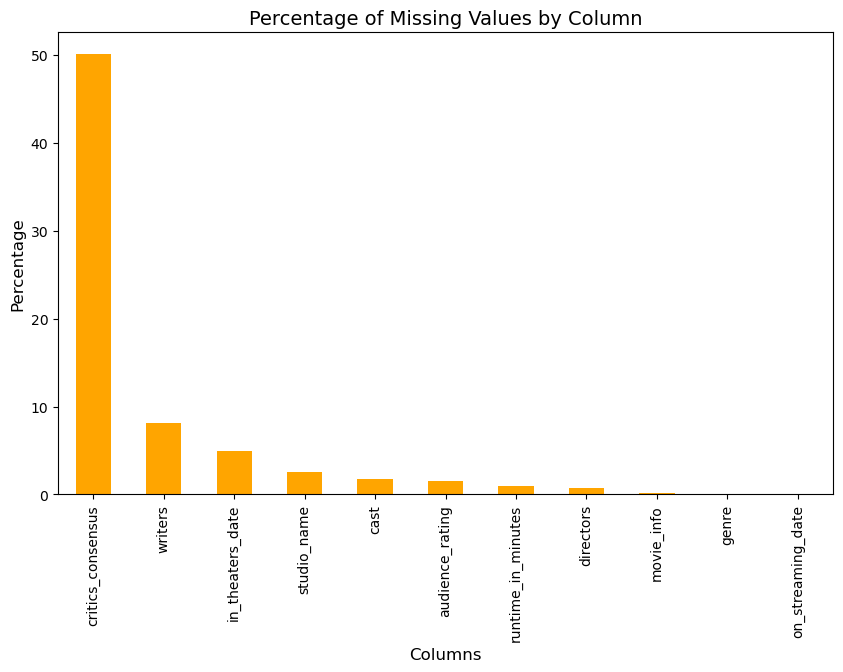

In [12]:
#Identifying missing values and exploring the relationships between features and the target
missing_values = df.isnull().mean() * 100

print("\nPercentage of Missing Values:")
print(missing_values[missing_values > 0])

plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Percentage of Missing Values by Column", fontsize=14)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.show()

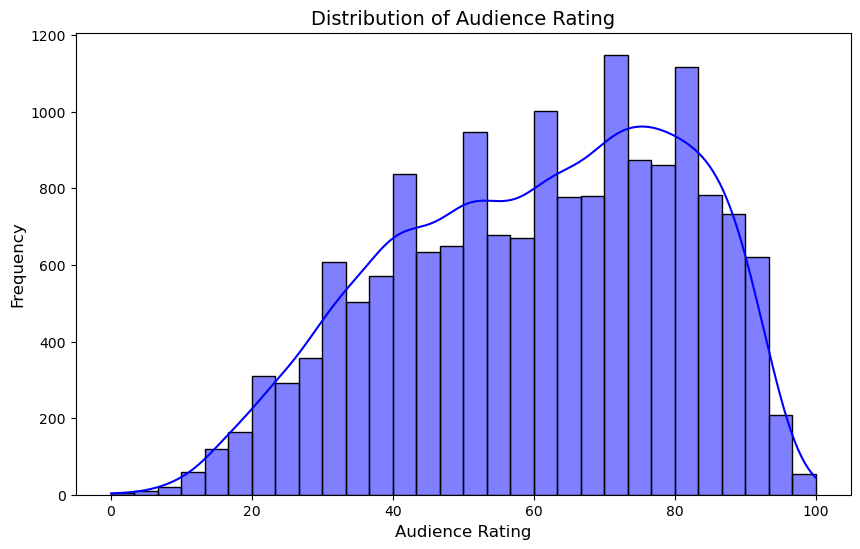


Summary Statistics for 'audience_rating':
count    16386.000000
mean        60.470829
std         20.462368
min          0.000000
25%         45.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: audience_rating, dtype: float64


In [14]:
#distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['audience_rating'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title("Distribution of Audience Rating", fontsize=14)
plt.xlabel("Audience Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Summary statistics for 'audience_rating'
print("\nSummary Statistics for 'audience_rating':")
print(df['audience_rating'].describe())


Correlation with 'audience_rating':
audience_rating       1.000000
tomatometer_rating    0.660111
runtime_in_minutes    0.168507
tomatometer_count     0.141012
Name: audience_rating, dtype: float64


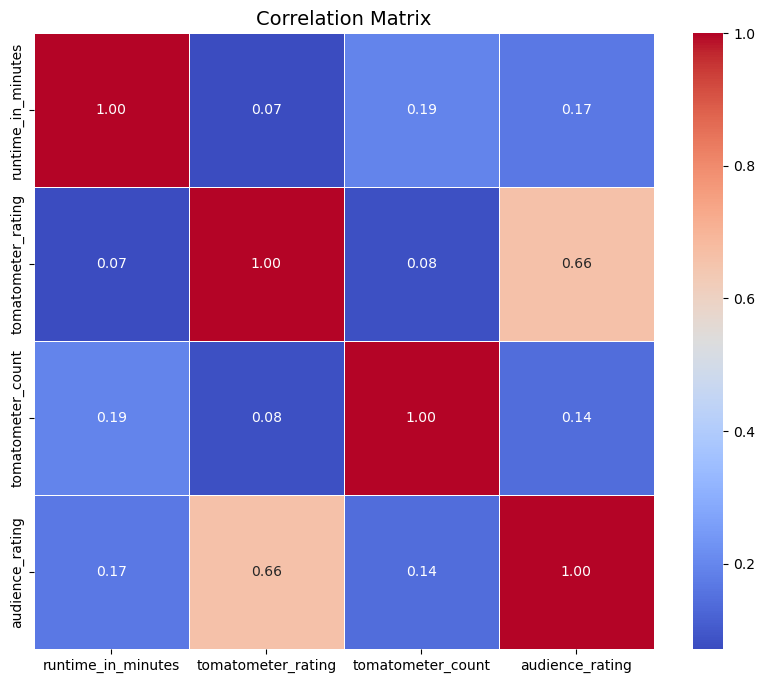

In [16]:
#Relationships Between Features and Target

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_features].corr()

print("\nCorrelation with 'audience_rating':")
print(correlation_matrix['audience_rating'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

C:\Users\thara\AppData\Local\Temp\ipykernel_18152\4100157492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='audience_rating', palette='Set2')


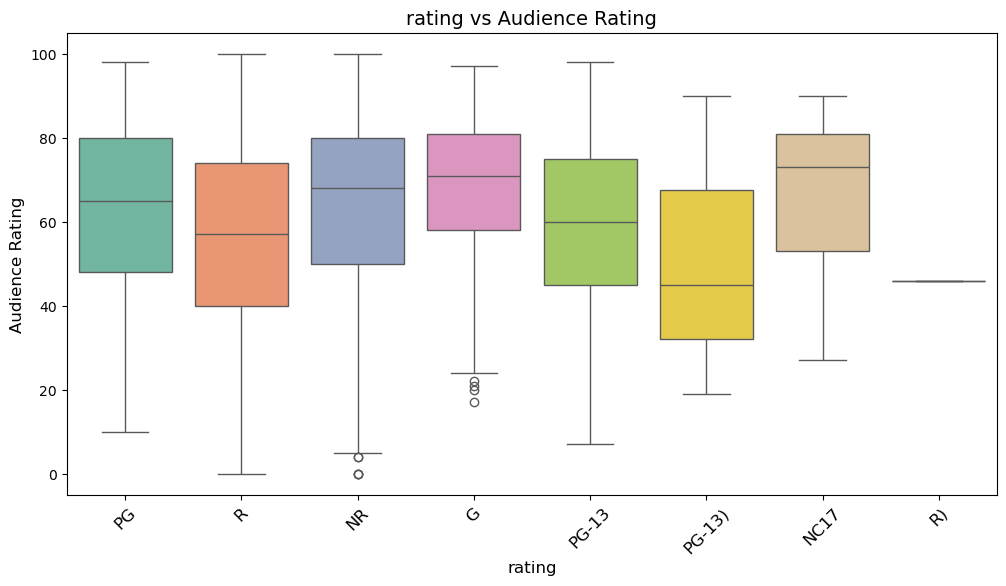

C:\Users\thara\AppData\Local\Temp\ipykernel_18152\4100157492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='audience_rating', palette='Set2')


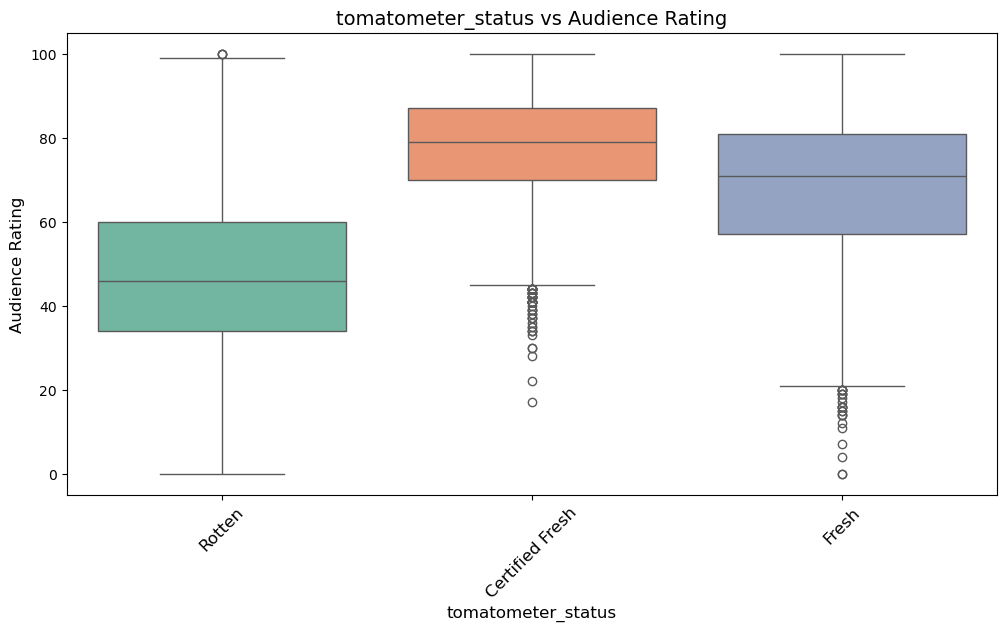

In [18]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    if df[feature].nunique() < 20:  
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=feature, y='audience_rating', palette='Set2')
        plt.title(f"{feature} vs Audience Rating", fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Audience Rating", fontsize=12)
        plt.show()

In [20]:
#handling missing values
df['audience_rating'] = pd.to_numeric(df['audience_rating'], errors='coerce')

imputer = SimpleImputer(strategy='mean')
df['audience_rating'] = imputer.fit_transform(df[['audience_rating']])

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
movie_title           0
movie_info            0
critics_consensus     0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64


In [22]:
#Encoding Categorical Variables
df_encoded = pd.get_dummies(df, columns=['rating', 'genre', 'directors', 'studio_name'], drop_first=True)
print(df_encoded.shape)

(16638, 12296)


In [24]:
# Convert 'in_theaters_date' to datetime format, specify dayfirst=True if necessary
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce', dayfirst=True)
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'], errors='coerce', dayfirst=True)

# Handle missing values in 'in_theaters_date'
# Option 1: Impute with median year, month, and day (or other strategy)
median_year = df['in_theaters_date'].dropna().dt.year.median()
median_month = df['in_theaters_date'].dropna().dt.month.median()
median_day = df['in_theaters_date'].dropna().dt.day.median()

df['in_theaters_date'] = df['in_theaters_date'].fillna(
    pd.Timestamp(year=int(median_year), month=int(median_month), day=int(median_day))
)

# Extract year, month, and day after imputation
df['in_theaters_year'] = df['in_theaters_date'].dt.year
df['in_theaters_month'] = df['in_theaters_date'].dt.month
df['in_theaters_day'] = df['in_theaters_date'].dt.day

# Check if the issue is resolved
print("\nMissing values in 'in_theaters_date' related columns after fixing:")
print(df[['in_theaters_year', 'in_theaters_month', 'in_theaters_day']].isnull().sum())



Missing values in 'in_theaters_date' related columns after fixing:
in_theaters_year     0
in_theaters_month    0
in_theaters_day      0
dtype: int64


In [26]:
df.drop(columns=['in_theaters_date', 'on_streaming_date'], inplace=True)

In [28]:
print("\nFinal missing values check:")
print(df.isnull().sum())


Final missing values check:
movie_title           0
movie_info            0
critics_consensus     0
rating                0
genre                 0
directors             0
writers               0
cast                  0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
in_theaters_year      0
in_theaters_month     0
in_theaters_day       0
dtype: int64


In [30]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

X = numeric_df.drop(columns=['audience_rating'])  
y = numeric_df['audience_rating'] 

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importances)

Feature Importance:
              Feature  Importance
1  tomatometer_rating    0.562107
0  runtime_in_minutes    0.228133
2   tomatometer_count    0.209761


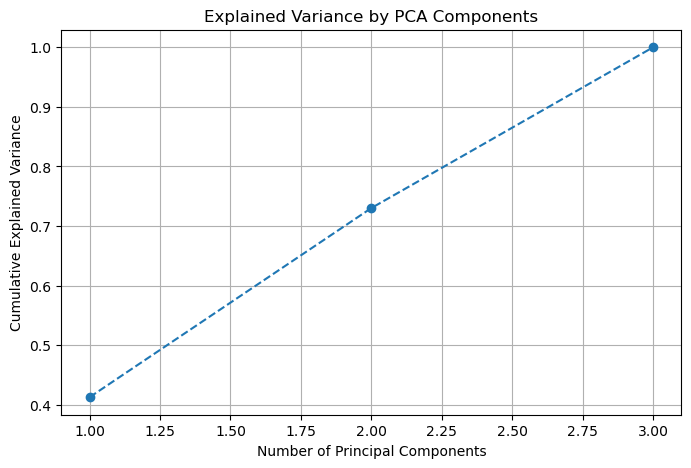

Number of components explaining 95% variance: 3


In [32]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

n_components = sum(cumulative_variance < 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)


C:\Users\thara\anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=3. All the features will be returned.
  warnings.warn(


Selected Features:
Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')

Model Evaluation Metrics:
Train R2 Score: 0.8518972167909331
Test R2 Score: 0.352191836966947
Train Mean Squared Error: 61.23212392992569
Test Mean Squared Error: 264.2591242080472
Train Mean Absolute Error: 5.680797101713735
Test Mean Absolute Error: 12.71304499849165

Cross-Validation R2 Scores: [0.33717857 0.38764874 0.35503395 0.37411658 0.35342836]
Mean R2 Score from Cross-Validation: 0.361481241635952


C:\Users\thara\AppData\Local\Temp\ipykernel_18152\3160710607.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


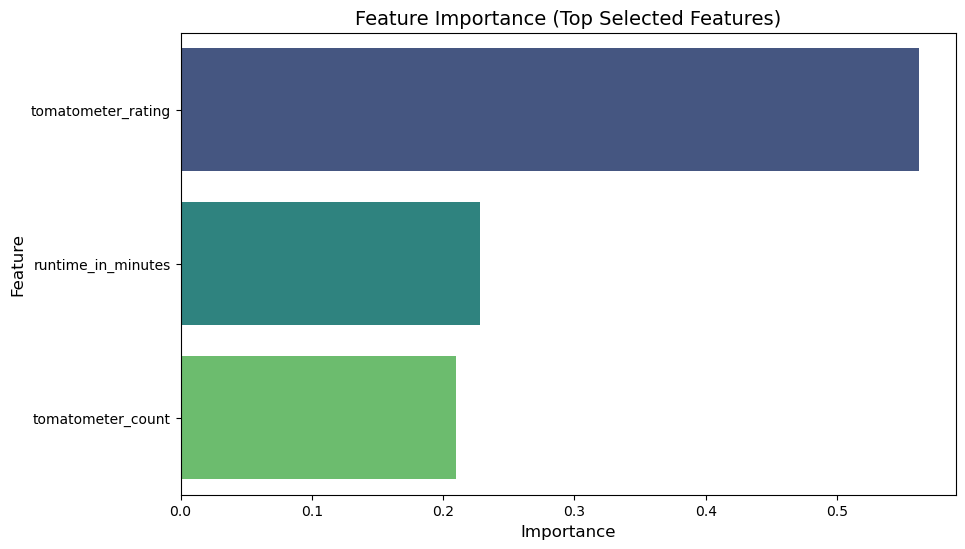

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Feature Selection using SelectKBest
# Use f_regression to evaluate the relationship between each feature and the target variable
k_best = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Get selected feature names
selected_features = X.columns[k_best.get_support()]
print("Selected Features:")
print(selected_features)

# Step 2: Model Training and Evaluation
# Train Random Forest Regressor on selected features
regressor = RandomForestRegressor(random_state=42, n_estimators=100)
regressor.fit(X_train_selected, y_train)

# Predictions
y_pred_train = regressor.predict(X_train_selected)
y_pred_test = regressor.predict(X_test_selected)

# Model Evaluation
print("\nModel Evaluation Metrics:")
print("Train R2 Score:", r2_score(y_train, y_pred_train))
print("Test R2 Score:", r2_score(y_test, y_pred_test))
print("Train Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("Train Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Test Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))

# Step 3: Cross-Validation
cv_scores = cross_val_score(regressor, X_train_selected, y_train, cv=5, scoring='r2')
print("\nCross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score from Cross-Validation:", np.mean(cv_scores))

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Top Selected Features)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


In [43]:
param_distributions = {
    'n_estimators': randint(50, 300),  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of the trees
    'min_samples_split': randint(2, 10),  # Minimum samples to split
    'min_samples_leaf': randint(1, 5),   # Minimum samples per leaf
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter combinations to try
    cv=5,  # Cross-validation folds
    scoring='r2',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train_selected, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation R2 Score:", random_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 257}
Best Cross-Validation R2 Score: 0.4603310622889779


In [45]:
# Train the Random Forest Regressor with the best parameters
best_regressor = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=6,
    n_estimators=257,
    random_state=42
)

# Fit the model on the training set
best_regressor.fit(X_train_selected, y_train)

# Predictions
y_pred_train = best_regressor.predict(X_train_selected)
y_pred_test = best_regressor.predict(X_test_selected)

# Evaluate the model
print("Final Model Evaluation Metrics:")
print("Train R2 Score:", r2_score(y_train, y_pred_train))
print("Test R2 Score:", r2_score(y_test, y_pred_test))
print("Train Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("Train Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Test Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))


Final Model Evaluation Metrics:
Train R2 Score: 0.5771415123712427
Test R2 Score: 0.45687941308865865
Train Mean Squared Error: 174.8280670914487
Test Mean Squared Error: 221.55412485783788
Train Mean Absolute Error: 10.461884502057595
Test Mean Absolute Error: 11.868010129588214


C:\Users\thara\AppData\Local\Temp\ipykernel_18152\598825249.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


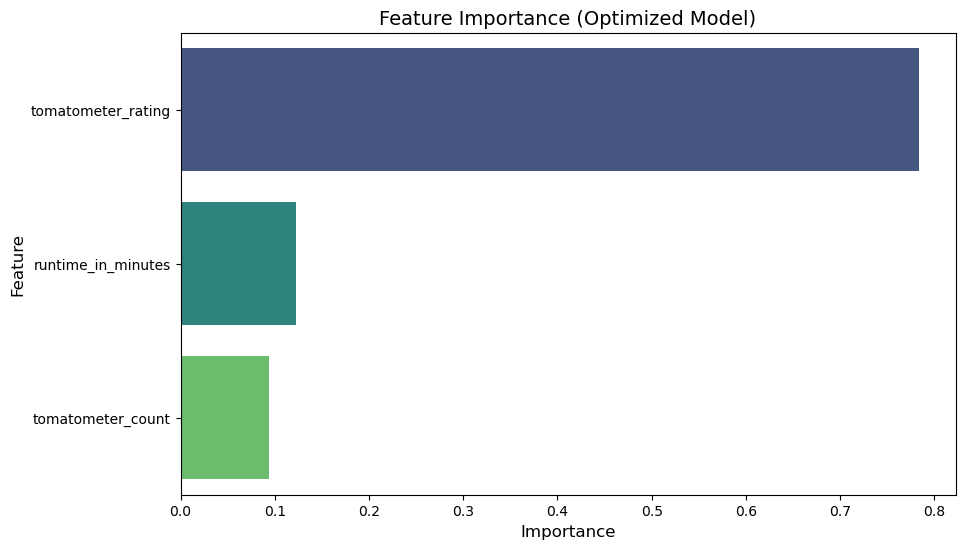

In [47]:
# Feature importance
importances = best_regressor.feature_importances_
feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Optimized Model)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


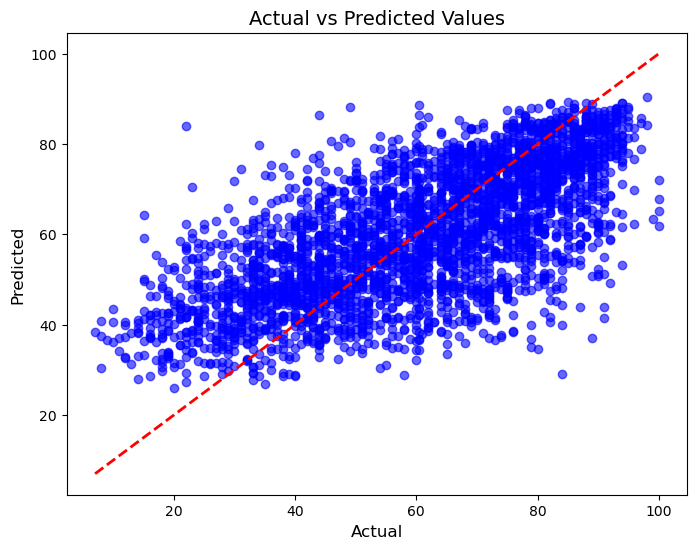

In [49]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.show()


In [51]:
# Create a DataFrame to show actual vs predicted values
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

# Display the first few rows
print("Actual vs Predicted Values:")
print(actual_vs_predicted.head())

# Save to a CSV file if needed
#actual_vs_predicted.to_csv("actual_vs_predicted.csv", index=False)


Actual vs Predicted Values:
       Actual  Predicted
4013     44.0  50.876239
6119     41.0  53.474983
12585    72.0  67.653115
4395     87.0  83.103020
9070     90.0  80.094383


In [57]:
importances_df = pd.DataFrame(importances, columns=['Importance'])

# Save to CSV
importances_df.to_csv('best_feature_importances.csv', index=False)

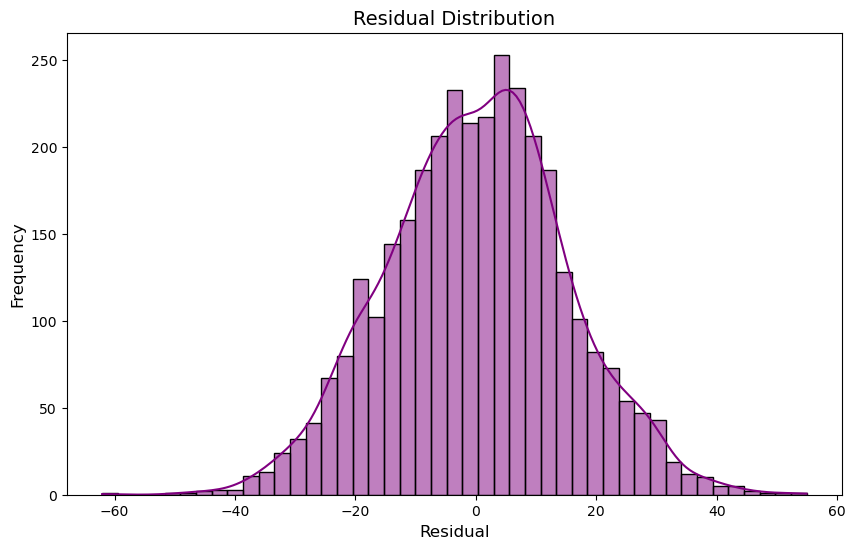

In [59]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution", fontsize=14)
plt.xlabel("Residual", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()
